# Auditory Sound Processing - Part I: Basics

In IPYNB-files I am using "%matplotlib inline", to display graphics in the noteboook. With "%matplotlib" graphics are shown in external graphics windows.

In [1]:
# Standard packages
import numpy as np
import matplotlib.pyplot as plt
import os

# Special imports
from scipy.io.wavfile import read

#ipynb_path = os.path.dirname(os.path.realpath("__file__"))
#os.chdir(ipynb_path)

%matplotlib inline

In many programming languages there are tools to read in WAV-files ("Waveform Audio File Format").

WAV files have a strictly defined format:
<img src="data/images/WAV-chunks.png">

An easy way to access most other sound-types is use the open source program [FFMPEG](http://ffmpeg.org) to convert other sound types to WAV. FFMPEG is an amazingly powerful tool for audio- and video-processing. And while it is not  required for the examples here, you should try to install it on your computer if you do any audio- or video-processing. It might take a bit of fiddling around to install it - but it is definitely worth while!
<img src="data/images/soundFiles.png" width=500>

<img src="data/images/piano.jpg" width=200>

In [2]:
audio_dir = 'data/sounds'
sound_file = os.path.join(audio_dir, 'a1.wav')
rate, data = read(sound_file)

In [3]:
data.dtype

dtype('int16')

If the data-type is <code>uint</code>, watch out for overflows:

In [22]:
value = np.uint8(255)
print(np.uint8(value + 2))

1


## Information about the sound

In [5]:
if len(data.shape)==1:
    print('Mono sound')
else:
    print('Stereo sound')

Mono sound


In [6]:
data.dtype

dtype('int16')

In [7]:
nData = len(data)
duration = nData/rate
print(f'Duration of recording: {duration:4.2f} sec')

Duration of recording: 2.46 sec


#### Example of stereo sound
Be careful: if you read in stereo-sound, you obtain a matrix, not a vector!

In [8]:
sound_file = os.path.join(audio_dir, 'tiger.wav')
rate, data = read(sound_file)
data.shape

(230400, 2)

## Play Sound

The following code allows you to play sound at the push of a button in this notebook. For a system-independent way to play sound in scripts, I recommend that you use the methods of *Sound* objects from the class *sksound.sounds.Sound* (from [scikit-sound](http://work.thaslwanter.at/sksound/html)).

In [9]:
from IPython.display import Audio

def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))

In [10]:
# back to a plain tone:
sound_file = os.path.join(audio_dir, 'a1.wav')
rate, data = read(sound_file)
play(data, rate)

In [11]:
%matplotlib inline

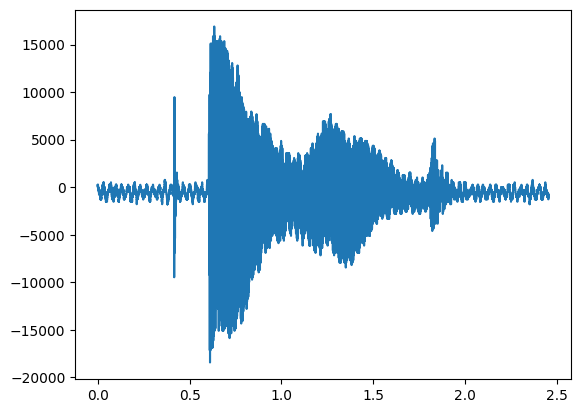

In [12]:
time = np.arange(len(data)) / rate
plt.plot(time, data)
# plt.xlim(0, 0.1)
# plt.ylim(-3000, 3000)

### Working with sound-files in Python programs
Python package [scikit-sound](http://work.thaslwanter.at/sksound/html/) allows convenient, object-oriented and platform-indendent work with sound-files:

In [15]:
import sksound
my_sound = sksound.sounds.Sound(sound_file)

data read in!


DataType: int16
Duration: 2.455419501133787
NumChannels: 1
SampleRate: 11025
Source: data/sounds\a1.wav
TotalSamples: 27071

Playing data/sounds\a1.wav


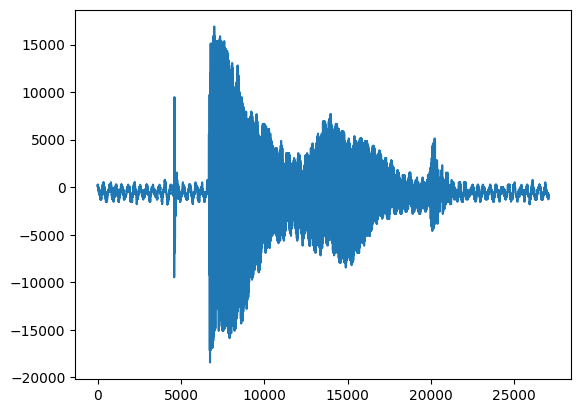

In [16]:
dir(my_sound)
my_sound.summary()
plt.plot(my_sound.data)
my_sound.play()

## Fourier Transform & Power spectrum

To see the frequency content of this sound, we can transfer the signal from the time-domain into the frequency-domain. The *Fourier Theorem* states that every signal can be regarded as a weighted superposition of pure sines, with the amplitude/phase of each frequency adjusted appropriately.

<img src='data/images/Idea_FourierTransform.png' style="width: 300px;"/>


### Complex numbers

A complex number can be represented either as a real- and a complex-part ("cartesian representation"), or with an amplitude (=magnitude) and a phase ("radial representation"). In this second form, complex numbers are ideal to represent [amplitude, phase] for each frequency component. These are the *Fourier coefficients* $F_n$ for the frequency $\omega_n = 2\pi*\frac{\tau}{N}$, where *N* is total number of samples, and $\tau$ the inverse of the sample rate.

<img src="data/images/ComplexNumber.jpg" width=200>

For *n* discrete datapoints $f_n$, the *Fourier Transformation* is given by:

\begin{equation}
  {f_\tau } = \frac{1}{N}\sum\limits_{n = 0}^{N - 1} {{F_n}\,{e^{2\pi j\,\frac{n \cdot \tau }{N}}}} \hspace{5 mm} with \; \tau=1,...,N
\end{equation}

The coefficients $F_n$ can be obtained by the back-transformation (*inverse Fourier Transformation*):

\begin{equation}
  {F_n} = \sum\limits_{\tau  = 0}^{N - 1} {{f_\tau }\,{e^{ - 2\pi j\,\frac{{n \cdot \tau }}{N}}}}  \hspace{5 mm} with \enspace n=1,...,N
\end{equation}

This notation makes use of the *Euler Theorem*
\begin{equation}
e^{j \omega*t} = \cos{\omega*t} + j* \sin{\omega*t}
\end{equation}

which allows to express sine-waves with $e^{j \omega*t}$.

(0.0, 5512.296368807949)

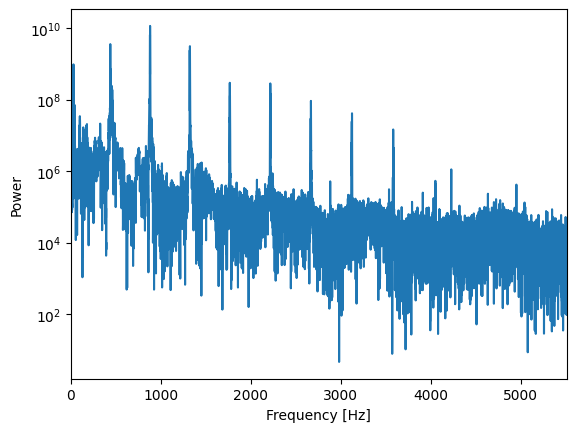

In [17]:
# Fourier Transformation of the data
# Here we use the function "fft" from the package "np.fft"
fftData = np.fft.fft(data)

# The Powerspectrum only contains the magnitude of the Fourier components
# Note: The conversion to real is only to eliminate an annoying Warning message
Pxx = np.real(fftData*fftData.conj()) / nData
freq = np.arange(nData)/duration

# Plot the data
plt.semilogy(freq, Pxx)

# Format the plot
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
Nyquist = max(freq)/2
plt.xlim(0, Nyquist)

### To do
Try plotting the powerspectrum on a linear scale. It gives a better understanding of the decreasing low-level noise underlying the signal.

### Symmetry of Powerspectrum
For real-valued inputs f(t) we have the following relation:

$F(ω)=F(−ω)^∗$

As a consequence, the powerspectrum is symmetrical!

Text(0, 0.5, 'Power')

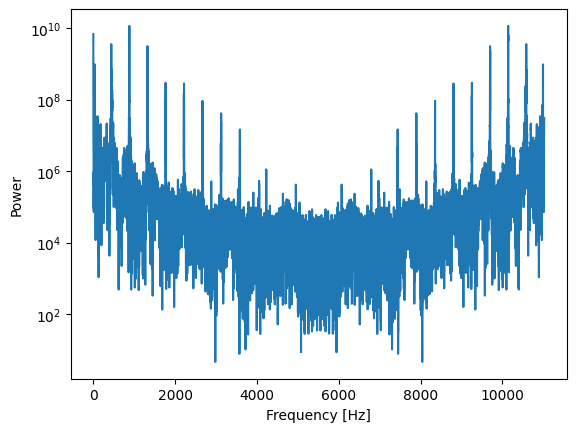

In [18]:
plt.semilogy(freq, Pxx)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

In [19]:
%precision 2
print(fftData[0])
print(fftData[1:3])  # second and third Fourier coefficients
print(fftData[:-3:-1]) # last two Fourier coefficients, with sequence reversed!
# Note that the last two components are the complex conjugate of the second and third component.
# The first component is real, and proportional to the offset.

(-13607461+0j)
[-167240.92-894878.j   -837190.94+290807.52j]
[-167240.92+894878.j   -837190.94-290807.52j]


### <font color='red'>Important: Frequency of the Fourier Coefficients</font>
* The power </color> in the *zero frequency* is proportional to the offset of the signal.
* The lowest frequency is determined by the length of the recorded signal: $f_1 =\frac{1}{\Delta t * N} = \frac{1}{Duration}$.
* The highest frequency is determined by the sample rate: $f_N = \frac{1}{\Delta t} = rate$.

### Spectral density for practical applications: Welch-periodogram

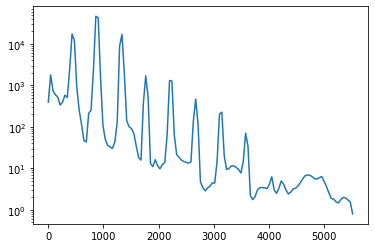

In [19]:
from scipy import signal
f, Pxx = signal.welch(data, rate)
plt.semilogy(f, Pxx)

## Further links to sound processing

* [FFMPEG](http://www.ffmpeg.org/) A complete, cross-platform solution to record, convert and stream audio and video. 
* [scikit-sound](http://work.thaslwanter.at/sksound/html/sounds.html) Class for reading/writing/playing sounds. Uses FFMPEG.
* [Pydub](http://pydub.com/) Lets you manipulate audio with a simple and easy high level interface. Requires FFMPEG.

<img src="data/images/Forward.png" align="middle"> [Soundproc_2_TimeDependence.ipynb](Soundproc_2_TimeDependence.ipynb)

    Author: Thomas Haslwanter
    Date: March 15, 2023

<img src="data/images/CCA_40.png">

*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.